In [1]:
# Library imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

pd.set_option('display.max_columns', None)

df = pd.read_csv("hitters.csv")

In [2]:
# Convert each column's name to the uppercase characters
df.columns = df.columns.str.upper()

# Some dataframe information
display(df.shape) # Shape of it
display(df.info()) # Variable types of it
display(df.describe().T) # Column counts, means, standart deviations etc.
display(df.isnull().sum()) # Checking any null values for each column of it
df

(322, 20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ATBAT      322 non-null    int64  
 1   HITS       322 non-null    int64  
 2   HMRUN      322 non-null    int64  
 3   RUNS       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   WALKS      322 non-null    int64  
 6   YEARS      322 non-null    int64  
 7   CATBAT     322 non-null    int64  
 8   CHITS      322 non-null    int64  
 9   CHMRUN     322 non-null    int64  
 10  CRUNS      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWALKS     322 non-null    int64  
 13  LEAGUE     322 non-null    object 
 14  DIVISION   322 non-null    object 
 15  PUTOUTS    322 non-null    int64  
 16  ASSISTS    322 non-null    int64  
 17  ERRORS     322 non-null    int64  
 18  SALARY     263 non-null    float64
 19  NEWLEAGUE  322 non-null    object 
dtypes: float64

None

,count,mean,std,min,25%,50%,75%,max
ATBAT,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
HITS,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HMRUN,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
RUNS,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
WALKS,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
YEARS,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CATBAT,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHITS,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHMRUN,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


ATBAT         0
HITS          0
HMRUN         0
RUNS          0
RBI           0
WALKS         0
YEARS         0
CATBAT        0
CHITS         0
CHMRUN        0
CRUNS         0
CRBI          0
CWALKS        0
LEAGUE        0
DIVISION      0
PUTOUTS       0
ASSISTS       0
ERRORS        0
SALARY       59
NEWLEAGUE     0
dtype: int64

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [3]:
# A method to observe categorical columns, numerical columns, and cardinal columns
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    print()
    
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)
print(f"Categorical columns: {cat_cols}")
print(f"Numerical columns: {num_cols}")

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0

Categorical columns: ['LEAGUE', 'DIVISION', 'NEWLEAGUE']
Numerical columns: ['ATBAT', 'HITS', 'HMRUN', 'RUNS', 'RBI', 'WALKS', 'YEARS', 'CATBAT', 'CHITS', 'CHMRUN', 'CRUNS', 'CRBI', 'CWALKS', 'PUTOUTS', 'ASSISTS', 'ERRORS', 'SALARY']


In [4]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
3,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
259,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
260,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
261,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [5]:
# A method to find the up and low limits by IQR
def outlier_thresholds(dataframe, col_name, q1=0.2, q3=0.8):
    quantile1 = dataframe[col_name].quantile(q1)
    quantile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quantile3 - quantile1
    up_limit = quantile3 + 1.5 * interquantile_range
    low_limit = quantile1 - 1.5 * interquantile_range
    
    return low_limit, up_limit

# A method to check if a column has any outlier or not
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

# # A method to show all existing outliers of a column
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        display(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        display(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

# Replacing the outlier value with the low or up limit depending on the situation
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [6]:
# Creating new features

# Career runs ratio
df["NEW_C_RUNS_RATIO"] = df["RUNS"] / df["CRUNS"]
# Career bat ratio
df["NEW_C_ATBAT_RATIO"] = df["ATBAT"] / df["CATBAT"]
# Career hits ratio
df["NEW_C_HITS_RATIO"] = df["HITS"] / df["CHITS"]
# Career hmrun ratio
df["NEW_C_HMRUN_RATIO"] = df["HMRUN"] / df["CHMRUN"]
# Career rbi ratio
df["NEW_C_RBI_RATIO"] = df["RBI"] / df["CRBI"]
# Career walks ratio
df["NEW_C_WALKS_RATIO"] = df["WALKS"] / df["CWALKS"]
# Hit rate ratio
df["NEW_C_HIT_RATE"] = df["CHITS"] / df["CATBAT"]
# Player type(runner)
df["NEW_C_RUNNER"] = df["CRBI"] / df["CHITS"]
# Player type(Hit and run)
df["NEW_C_HIT-AND-RUN"] = df["CRUNS"] / df["CHITS"]
# Most valuable hit ratio in hits
df["NEW_C_HMHITS_RATIO"] = df["CHMRUN"] / df["CHITS"]
# Most valuable hit ratio in all shots
df["NEW_C_HMATBAT_RATIO"] = df["CATBAT"] / df["CHMRUN"]

# Annual averages
df["NEW_CATBAT_MEAN"] = df["CATBAT"] / df["YEARS"]
df["NEW_CHITS_MEAN"] = df["CHITS"] / df["YEARS"]
df["NEW_CHMRUN_MEAN"] = df["CHMRUN"] / df["YEARS"]
df["NEW_CRUNS_MEAN"] = df["CRUNS"] / df["YEARS"]
df["NEW_CRBI_MEAN"] = df["CRBI"] / df["YEARS"]
df["NEW_CWALKS_MEAN"] = df["CWALKS"] / df["YEARS"]

# Player level
df.loc[(df["YEARS"] <= 2), "NEW_YEARS_LEVEL"] = "Junior"
df.loc[(df["YEARS"] > 2) & (df['YEARS'] <= 5), "NEW_YEARS_LEVEL"] = "Mid"
df.loc[(df["YEARS"] > 5) & (df['YEARS'] <= 10), "NEW_YEARS_LEVEL"] = "Senior"
df.loc[(df["YEARS"] > 10), "NEW_YEARS_LEVEL"] = "Expert"

# Player level X division
df.loc[(df["NEW_YEARS_LEVEL"] == "Junior") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Junior-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Junior") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Junior-West"
df.loc[(df["NEW_YEARS_LEVEL"] == "Mid") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Mid-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Mid") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Mid-West"
df.loc[(df["NEW_YEARS_LEVEL"] == "Senior") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Senior-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Senior") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Senior-West"
df.loc[(df["NEW_YEARS_LEVEL"] == "Expert") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Expert-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Expert") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Expert-West"

# Player promotion to next league
df.loc[(df["LEAGUE"] == "N") & (df["NEWLEAGUE"] == "N"), "NEW_PLAYER_PROGRESS"] = "StandN"
df.loc[(df["LEAGUE"] == "A") & (df["NEWLEAGUE"] == "A"), "NEW_PLAYER_PROGRESS"] = "StandA"
df.loc[(df["LEAGUE"] == "N") & (df["NEWLEAGUE"] == "A"), "NEW_PLAYER_PROGRESS"] = "Descend"
df.loc[(df["LEAGUE"] == "A") & (df["NEWLEAGUE"] == "N"), "NEW_PLAYER_PROGRESS"] = "Ascend"

# Player ratio in year
df["NEW_ASSISTS_RATIO"] = df["ASSISTS"] / df["ATBAT"]
df["NEW_HITS_RECALL"] = df["HITS"] / (df["HITS"] + df["ERRORS"])
df["NEW_NET_HELPFUL_ERROR"] = (df["WALKS"] - df["ERRORS"]) / df["WALKS"]
df["NEW_TOTAL_SCORE"] = (df["RBI"] + df["ASSISTS"] + df["WALKS"] - df["ERRORS"]) / df["ATBAT"]
df["NEW_HIT_RATE"] = df["HITS"] / df["ATBAT"]
df["NEW_TOUCHER"] = df["ASSISTS"] / df["PUTOUTS"]
df["NEW_RUNNER"] = df["RBI"] / df["HITS"]
df["NEW_HIT-AND-RUN"] = df["RUNS"] / (df["HITS"])
df["NEW_HMHITS_RATIO"] = df["HMRUN"] / df["HITS"]
df["NEW_HMATBAT_RATIO"] = df["ATBAT"] / df["HMRUN"]
df["NEW_TOTAL_CHANCES"] = df["ERRORS"] + df["PUTOUTS"] + df["ASSISTS"]

display(df.isnull().sum())
df

ATBAT                     0
HITS                      0
HMRUN                     0
RUNS                      0
RBI                       0
WALKS                     0
YEARS                     0
CATBAT                    0
CHITS                     0
CHMRUN                    0
CRUNS                     0
CRBI                      0
CWALKS                    0
LEAGUE                    0
DIVISION                  0
PUTOUTS                   0
ASSISTS                   0
ERRORS                    0
SALARY                    0
NEWLEAGUE                 0
NEW_C_RUNS_RATIO          0
NEW_C_ATBAT_RATIO         0
NEW_C_HITS_RATIO          0
NEW_C_HMRUN_RATIO         3
NEW_C_RBI_RATIO           0
NEW_C_WALKS_RATIO         0
NEW_C_HIT_RATE            0
NEW_C_RUNNER              0
NEW_C_HIT-AND-RUN         0
NEW_C_HMHITS_RATIO        0
NEW_C_HMATBAT_RATIO       0
NEW_CATBAT_MEAN           0
NEW_CHITS_MEAN            0
NEW_CHMRUN_MEAN           0
NEW_CRUNS_MEAN            0
NEW_CRBI_MEAN       

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N,0.074766,0.091331,0.097006,0.101449,0.091787,0.104000,0.242099,0.495808,0.384431,0.082635,49.985507,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714,Expert,Expert-West,StandN,0.136508,0.890110,0.743590,0.349206,0.257143,0.068038,0.469136,0.296296,0.086420,45.000000,685
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A,0.294643,0.294951,0.284464,0.285714,0.270677,0.288973,0.281404,0.582057,0.490153,0.137856,25.777778,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667,Mid,Mid-West,StandA,0.171190,0.902778,0.815789,0.450939,0.271399,0.093182,0.553846,0.507692,0.138462,26.611111,976
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N,0.078502,0.088131,0.089524,0.088889,0.093079,0.104520,0.279851,0.532063,0.525714,0.142857,25.013333,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818,Expert,Expert-East,StandN,0.022177,0.979167,0.918919,0.247984,0.284274,0.055000,0.553191,0.460993,0.141844,24.800000,214
3,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N,0.812500,0.810606,0.861386,0.833333,0.913043,0.909091,0.255051,0.455446,0.475248,0.118812,33.000000,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000,Junior,Junior-East,StandN,0.124611,0.956044,0.866667,0.336449,0.271028,0.049689,0.482759,0.448276,0.114943,32.100000,849
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A,0.147705,0.134755,0.149162,0.210526,0.151786,0.180412,0.257033,0.296558,0.442189,0.016770,232.000000,400.727273,103.000000,1.727273,45.545455,30.545455,17.636364,Expert,Expert-West,StandA,0.708754,0.871134,0.285714,0.811448,0.284512,1.492908,0.301775,0.437870,0.023669,148.500000,728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N,0.171504,0.183870,0.157568,0.218750,0.154341,0.268116,0.298187,0.385856,0.470223,0.039702,84.468750,540.600000,161.200000,6.400000,75.800000,62.200000,27.600000,Mid,Mid-East,StandN,0.018109,0.976923,0.918919,0.183099,0.255533,0.027692,0.377953,0.511811,0.055118,71.000000,337
259,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A,0.084727,0.089276,0.090007,0.128205,0.110865,0.107429,0.274179,0.298478,0.593647,0.025811,141.307692,459.250000,125.916667,3.250000,74.750000,37.583333,72.916667,Expert,Expert-East,StandA,0.774390,0.871795,0.787234,1.026423,0.276423,1.217252,0.367647,0.558824,0.036765,98.400000,714
260,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A,0.281106,0.279412,0.290993,0.428571,0.462366,0.356164,0.254706,0.214781,0.501155,0.016166,242.857143,283.333333,72.166667,1.166667,36.166667,15.500000,24.333333,Senior,Senior-West,StandA,0.237895,0.947368,0.865385,0.423158,0.265263,3.054054,0.341270,0.484127,0.023810,158.333333,157
261,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A,0.180851,0.179174,0.168028,0.092784,0.142857,0.234940,0.267980,0.490082,0.548425,0.113186,32.969072,399.750000,107.125000,12.125000,58.750000,52.500000,41.500000,Senior,Senior-East,StandA,0.228621,0.923077,0.846154,0.448517,0.251309,0.099696,0.416667,0.590278,0.062500,63.666

In [7]:
# Applying Label Encoding for binary columns
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]
for col in binary_cols:
    labelencoder = LabelEncoder()
    df[col] = labelencoder.fit_transform(df[col])
    
df

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1,0.074766,0.091331,0.097006,0.101449,0.091787,0.104000,0.242099,0.495808,0.384431,0.082635,49.985507,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714,Expert,Expert-West,StandN,0.136508,0.890110,0.743590,0.349206,0.257143,0.068038,0.469136,0.296296,0.086420,45.000000,685
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0,0.294643,0.294951,0.284464,0.285714,0.270677,0.288973,0.281404,0.582057,0.490153,0.137856,25.777778,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667,Mid,Mid-West,StandA,0.171190,0.902778,0.815789,0.450939,0.271399,0.093182,0.553846,0.507692,0.138462,26.611111,976
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,1,0.078502,0.088131,0.089524,0.088889,0.093079,0.104520,0.279851,0.532063,0.525714,0.142857,25.013333,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818,Expert,Expert-East,StandN,0.022177,0.979167,0.918919,0.247984,0.284274,0.055000,0.553191,0.460993,0.141844,24.800000,214
3,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,1,0.812500,0.810606,0.861386,0.833333,0.913043,0.909091,0.255051,0.455446,0.475248,0.118812,33.000000,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000,Junior,Junior-East,StandN,0.124611,0.956044,0.866667,0.336449,0.271028,0.049689,0.482759,0.448276,0.114943,32.100000,849
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,750.0,0,0.147705,0.134755,0.149162,0.210526,0.151786,0.180412,0.257033,0.296558,0.442189,0.016770,232.000000,400.727273,103.000000,1.727273,45.545455,30.545455,17.636364,Expert,Expert-West,StandA,0.708754,0.871134,0.285714,0.811448,0.284512,1.492908,0.301775,0.437870,0.023669,148.500000,728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,497,127,7,65,48,37,5,2703,806,32,379,311,138,1,0,325,9,3,700.0,1,0.171504,0.183870,0.157568,0.218750,0.154341,0.268116,0.298187,0.385856,0.470223,0.039702,84.468750,540.600000,161.200000,6.400000,75.800000,62.200000,27.600000,Mid,Mid-East,StandN,0.018109,0.976923,0.918919,0.183099,0.255533,0.027692,0.377953,0.511811,0.055118,71.000000,337
259,492,136,5,76,50,94,12,5511,1511,39,897,451,875,0,0,313,381,20,875.0,0,0.084727,0.089276,0.090007,0.128205,0.110865,0.107429,0.274179,0.298478,0.593647,0.025811,141.307692,459.250000,125.916667,3.250000,74.750000,37.583333,72.916667,Expert,Expert-East,StandA,0.774390,0.871795,0.787234,1.026423,0.276423,1.217252,0.367647,0.558824,0.036765,98.400000,714
260,475,126,3,61,43,52,6,1700,433,7,217,93,146,0,1,37,113,7,385.0,0,0.281106,0.279412,0.290993,0.428571,0.462366,0.356164,0.254706,0.214781,0.501155,0.016166,242.857143,283.333333,72.166667,1.166667,36.166667,15.500000,24.333333,Senior,Senior-West,StandA,0.237895,0.947368,0.865385,0.423158,0.265263,3.054054,0.341270,0.484127,0.023810,158.333333,157
261,573,144,9,85,60,78,8,3198,857,97,470,420,332,0,0,1314,131,12,960.0,0,0.180851,0.179174,0.168028,0.092784,0.142857,0.234940,0.267980,0.490082,0.548425,0.113186,32.969072,399.750000,107.125000,12.125000,58.750000,52.500000,41.500000,Senior,Senior-East,StandA,0.228621,0.923077,0.846154,0.448517,0.251309,0.099696,0.416667,0.590278,0.062500,63.666

In [8]:
# Replacing the positive and negative infinite values(if there are existing) with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1,0.074766,0.091331,0.097006,0.101449,0.091787,0.104000,0.242099,0.495808,0.384431,0.082635,49.985507,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714,Expert,Expert-West,StandN,0.136508,0.890110,0.743590,0.349206,0.257143,0.068038,0.469136,0.296296,0.086420,45.000000,685
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0,0.294643,0.294951,0.284464,0.285714,0.270677,0.288973,0.281404,0.582057,0.490153,0.137856,25.777778,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667,Mid,Mid-West,StandA,0.171190,0.902778,0.815789,0.450939,0.271399,0.093182,0.553846,0.507692,0.138462,26.611111,976
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,1,0.078502,0.088131,0.089524,0.088889,0.093079,0.104520,0.279851,0.532063,0.525714,0.142857,25.013333,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818,Expert,Expert-East,StandN,0.022177,0.979167,0.918919,0.247984,0.284274,0.055000,0.553191,0.460993,0.141844,24.800000,214
3,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,1,0.812500,0.810606,0.861386,0.833333,0.913043,0.909091,0.255051,0.455446,0.475248,0.118812,33.000000,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000,Junior,Junior-East,StandN,0.124611,0.956044,0.866667,0.336449,0.271028,0.049689,0.482759,0.448276,0.114943,32.100000,849
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,750.0,0,0.147705,0.134755,0.149162,0.210526,0.151786,0.180412,0.257033,0.296558,0.442189,0.016770,232.000000,400.727273,103.000000,1.727273,45.545455,30.545455,17.636364,Expert,Expert-West,StandA,0.708754,0.871134,0.285714,0.811448,0.284512,1.492908,0.301775,0.437870,0.023669,148.500000,728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,497,127,7,65,48,37,5,2703,806,32,379,311,138,1,0,325,9,3,700.0,1,0.171504,0.183870,0.157568,0.218750,0.154341,0.268116,0.298187,0.385856,0.470223,0.039702,84.468750,540.600000,161.200000,6.400000,75.800000,62.200000,27.600000,Mid,Mid-East,StandN,0.018109,0.976923,0.918919,0.183099,0.255533,0.027692,0.377953,0.511811,0.055118,71.000000,337
259,492,136,5,76,50,94,12,5511,1511,39,897,451,875,0,0,313,381,20,875.0,0,0.084727,0.089276,0.090007,0.128205,0.110865,0.107429,0.274179,0.298478,0.593647,0.025811,141.307692,459.250000,125.916667,3.250000,74.750000,37.583333,72.916667,Expert,Expert-East,StandA,0.774390,0.871795,0.787234,1.026423,0.276423,1.217252,0.367647,0.558824,0.036765,98.400000,714
260,475,126,3,61,43,52,6,1700,433,7,217,93,146,0,1,37,113,7,385.0,0,0.281106,0.279412,0.290993,0.428571,0.462366,0.356164,0.254706,0.214781,0.501155,0.016166,242.857143,283.333333,72.166667,1.166667,36.166667,15.500000,24.333333,Senior,Senior-West,StandA,0.237895,0.947368,0.865385,0.423158,0.265263,3.054054,0.341270,0.484127,0.023810,158.333333,157
261,573,144,9,85,60,78,8,3198,857,97,470,420,332,0,0,1314,131,12,960.0,0,0.180851,0.179174,0.168028,0.092784,0.142857,0.234940,0.267980,0.490082,0.548425,0.113186,32.969072,399.750000,107.125000,12.125000,58.750000,52.500000,41.500000,Senior,Senior-East,StandA,0.228621,0.923077,0.846154,0.448517,0.251309,0.099696,0.416667,0.590278,0.062500,63.666

In [9]:
# Finding the columns that have any empty value
cols_include_nan = [col for col in df.columns if df[col].isnull().any()]
cols_include_nan

['NEW_C_HMRUN_RATIO',
 'NEW_C_HMATBAT_RATIO',
 'NEW_NET_HELPFUL_ERROR',
 'NEW_TOUCHER',
 'NEW_HMATBAT_RATIO']

In [10]:
# A loop to fill some missing values
# KNN imputing
imputer = KNNImputer(n_neighbors=5)
df[cols_include_nan] = imputer.fit_transform(df[cols_include_nan])

df

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1,0.074766,0.091331,0.097006,0.101449,0.091787,0.104000,0.242099,0.495808,0.384431,0.082635,49.985507,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714,Expert,Expert-West,StandN,0.136508,0.890110,0.743590,0.349206,0.257143,0.068038,0.469136,0.296296,0.086420,45.000000,685
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0,0.294643,0.294951,0.284464,0.285714,0.270677,0.288973,0.281404,0.582057,0.490153,0.137856,25.777778,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667,Mid,Mid-West,StandA,0.171190,0.902778,0.815789,0.450939,0.271399,0.093182,0.553846,0.507692,0.138462,26.611111,976
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,1,0.078502,0.088131,0.089524,0.088889,0.093079,0.104520,0.279851,0.532063,0.525714,0.142857,25.013333,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818,Expert,Expert-East,StandN,0.022177,0.979167,0.918919,0.247984,0.284274,0.055000,0.553191,0.460993,0.141844,24.800000,214
3,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,1,0.812500,0.810606,0.861386,0.833333,0.913043,0.909091,0.255051,0.455446,0.475248,0.118812,33.000000,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000,Junior,Junior-East,StandN,0.124611,0.956044,0.866667,0.336449,0.271028,0.049689,0.482759,0.448276,0.114943,32.100000,849
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,750.0,0,0.147705,0.134755,0.149162,0.210526,0.151786,0.180412,0.257033,0.296558,0.442189,0.016770,232.000000,400.727273,103.000000,1.727273,45.545455,30.545455,17.636364,Expert,Expert-West,StandA,0.708754,0.871134,0.285714,0.811448,0.284512,1.492908,0.301775,0.437870,0.023669,148.500000,728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,497,127,7,65,48,37,5,2703,806,32,379,311,138,1,0,325,9,3,700.0,1,0.171504,0.183870,0.157568,0.218750,0.154341,0.268116,0.298187,0.385856,0.470223,0.039702,84.468750,540.600000,161.200000,6.400000,75.800000,62.200000,27.600000,Mid,Mid-East,StandN,0.018109,0.976923,0.918919,0.183099,0.255533,0.027692,0.377953,0.511811,0.055118,71.000000,337
259,492,136,5,76,50,94,12,5511,1511,39,897,451,875,0,0,313,381,20,875.0,0,0.084727,0.089276,0.090007,0.128205,0.110865,0.107429,0.274179,0.298478,0.593647,0.025811,141.307692,459.250000,125.916667,3.250000,74.750000,37.583333,72.916667,Expert,Expert-East,StandA,0.774390,0.871795,0.787234,1.026423,0.276423,1.217252,0.367647,0.558824,0.036765,98.400000,714
260,475,126,3,61,43,52,6,1700,433,7,217,93,146,0,1,37,113,7,385.0,0,0.281106,0.279412,0.290993,0.428571,0.462366,0.356164,0.254706,0.214781,0.501155,0.016166,242.857143,283.333333,72.166667,1.166667,36.166667,15.500000,24.333333,Senior,Senior-West,StandA,0.237895,0.947368,0.865385,0.423158,0.265263,3.054054,0.341270,0.484127,0.023810,158.333333,157
261,573,144,9,85,60,78,8,3198,857,97,470,420,332,0,0,1314,131,12,960.0,0,0.180851,0.179174,0.168028,0.092784,0.142857,0.234940,0.267980,0.490082,0.548425,0.113186,32.969072,399.750000,107.125000,12.125000,58.750000,52.500000,41.500000,Senior,Senior-East,StandA,0.228621,0.923077,0.846154,0.448517,0.251309,0.099696,0.416667,0.590278,0.062500,63.666

In [11]:
# Observing the updated versions of columns after all the features added
cat_cols, num_cols, cat_but_car = grab_col_names(df)

# Dropping some numerical outliers
for col in num_cols:
    outlier_indexes = grab_outliers(df, col, index=True)
    display(outlier_indexes)
    df.drop(outlier_indexes, inplace=True)
    
df.reset_index(drop=True, inplace=True)
df

Observations: 263
Variables: 51
cat_cols: 6
num_cols: 45
cat_but_car: 0
num_but_cat: 3



,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
188,237,52,0,15,25,30,24,14053,4256,160,2165,1314,1566,1,1,523,43,6,750.0,1,0.006928,0.016865,0.012218,0.0,0.019026,0.019157,0.302853,0.308741,0.508694,0.037594,87.83125,585.541667,177.333333,6.666667,90.208333,54.75,65.25,Expert,Expert-West,StandN,0.181435,0.896552,0.8,0.388186,0.219409,0.082218,0.480769,0.288462,0.0,56.546429,572


Int64Index([188], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
8,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0,0,0,1100.000,0,0.062500,0.077027,0.069069,0.067194,0.074157,0.075058,0.255859,0.668168,0.588589,0.189940,20.577075,400.461538,102.461538,19.461538,60.307692,68.461538,66.615385,Expert,Expert-East,StandA,0.000000,1.000000,1.000000,0.326683,0.229426,1.973458,0.717391,0.532609,0.184783,23.588235,0
37,457,101,14,42,63,22,17,6521,1767,281,1003,977,619,0,1,389,39,4,875.000,0,0.041874,0.070081,0.057159,0.049822,0.064483,0.035541,0.270971,0.552915,0.567629,0.159027,23.206406,383.588235,103.941176,16.529412,59.000000,57.470588,36.411765,Expert,Expert-West,StandA,0.085339,0.961905,0.818182,0.262582,0.221007,0.100257,0.623762,0.415842,0.138614,32.642857,432
49,585,139,31,93,94,62,17,7546,1982,315,1141,1179,727,0,0,0,0,0,950.000,0,0.081507,0.077525,0.070131,0.098413,0.079729,0.085282,0.262656,0.594854,0.575681,0.158930,23.955556,443.882353,116.588235,18.529412,67.117647,69.352941,42.764706,Expert,Expert-East,StandA,0.000000,1.000000,1.000000,0.266667,0.237607,1.798719,0.676259,0.669065,0.223022,18.870968,0
54,507,122,29,78,85,91,18,7761,1947,347,1175,1152,1380,0,0,808,108,2,535.000,0,0.066383,0.065327,0.062661,0.083573,0.073785,0.065942,0.250870,0.591680,0.603493,0.178223,22.365994,431.166667,108.166667,19.277778,65.277778,64.000000,76.666667,Expert,Expert-East,StandA,0.213018,0.983871,0.978022,0.556213,0.240631,0.133663,0.696721,0.639344,0.237705,17.482759,918
55,529,137,26,86,97,97,15,6661,1785,291,1082,949,989,0,0,280,10,5,933.333,0,0.079482,0.079418,0.076751,0.089347,0.102213,0.098079,0.267978,0.531653,0.606162,0.163025,22.890034,444.066667,119.000000,19.400000,72.133333,63.266667,65.933333,Expert,Expert-East,StandA,0.018904,0.964789,0.948454,0.376181,0.258979,0.035714,0.708029,0.627737,0.189781,20.346154,295


Int64Index([8, 37, 49, 54, 55, 62, 64, 73, 76, 83, 87, 91, 126, 195, 200, 225,
            248],
           dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
14,568,158,20,89,75,73,15,8068,2273,177,1045,993,732,1,1,105,290,10,775.000,1,0.085167,0.070402,0.069512,0.112994,0.075529,0.099727,0.281730,0.436868,0.459745,0.077871,45.581921,537.866667,151.533333,11.800000,69.666667,66.200000,48.800000,Expert,Expert-West,StandN,0.510563,0.940476,0.863014,0.753521,0.278169,2.761905,0.474684,0.563291,0.126582,28.400000,405
20,629,168,18,73,102,40,18,8424,2464,164,1008,1072,402,0,0,1067,157,14,776.667,0,0.072421,0.074668,0.068182,0.109756,0.095149,0.099502,0.292498,0.435065,0.409091,0.066558,51.365854,468.000000,136.888889,9.111111,56.000000,59.555556,22.333333,Expert,Expert-East,StandA,0.249603,0.923077,0.650000,0.453100,0.267091,0.147142,0.607143,0.434524,0.107143,34.944444,1238
81,441,128,16,70,73,80,14,6675,2095,209,1072,1050,695,0,1,97,218,16,1500.000,0,0.065299,0.066067,0.061098,0.076555,0.069524,0.115108,0.313858,0.501193,0.511695,0.099761,31.937799,476.785714,149.642857,14.928571,76.571429,75.000000,49.642857,Expert,Expert-West,StandA,0.494331,0.888889,0.800000,0.804989,0.290249,2.247423,0.570312,0.546875,0.125000,27.562500,331
90,370,96,21,49,46,60,15,6986,1972,231,1070,955,921,1,0,137,5,9,733.333,1,0.045794,0.052963,0.048682,0.090909,0.048168,0.065147,0.282279,0.484280,0.542596,0.117140,30.242424,465.733333,131.466667,15.400000,71.333333,63.666667,61.400000,Expert,Expert-East,StandN,0.013514,0.914286,0.850000,0.275676,0.259459,0.036496,0.479167,0.510417,0.218750,17.619048,151
101,278,70,7,22,37,18,18,7186,2081,190,935,1088,643,0,1,0,0,0,325.000,0,0.023529,0.038686,0.033638,0.036842,0.034007,0.027994,0.289591,0.522826,0.449303,0.091302,37.821053,399.222222,115.611111,10.555556,51.944444,60.444444,35.722222,Expert,Expert-West,StandA,0.000000,1.000000,1.000000,0.197842,0.251799,1.338146,0.528571,0.314286,0.100000,39.714286,0
111,479,133,10,48,72,55,17,7472,2147,153,980,1032,854,1,1,237,5,4,773.333,1,0.048980,0.064106,0.061947,0.065359,0.069767,0.064403,0.287339,0.480671,0.456451,0.071262,48.836601,439.529412,126.294118,9.000000,57.647059,60.705882,50.235294,Expert,Expert-West,StandN,0.010438,0.970803,0.927273,0.267223,0.277662,0.021097,0.541353,0.360902,0.075188,47.900000,246


Int64Index([14, 20, 81, 90, 101, 111], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
25,513,137,20,90,95,90,14,5201,1382,166,763,734,784,0,1,267,5,3,900.0,0,0.117955,0.098635,0.099132,0.120482,0.129428,0.114796,0.265718,0.531114,0.552098,0.120116,31.331325,371.500000,98.714286,11.857143,54.500000,52.428571,56.000000,Expert,Expert-West,StandA,0.009747,0.978571,0.966667,0.364522,0.267057,0.018727,0.693431,0.656934,0.145985,25.650000,275
46,155,44,6,21,23,15,16,6631,1634,98,698,661,777,1,0,53,88,3,275.0,1,0.030086,0.023375,0.026928,0.061224,0.034796,0.019305,0.246418,0.404529,0.427173,0.059976,67.663265,414.437500,102.125000,6.125000,43.625000,41.312500,48.562500,Expert,Expert-East,StandN,0.567742,0.936170,0.800000,0.793548,0.283871,1.660377,0.522727,0.477273,0.136364,25.833333,144
60,255,70,7,49,35,43,15,6311,1661,154,1019,608,820,1,0,51,54,8,450.0,1,0.048086,0.040406,0.042143,0.045455,0.057566,0.052439,0.263191,0.366045,0.613486,0.092715,40.980519,420.733333,110.733333,10.266667,67.933333,40.533333,54.666667,Expert,Expert-East,StandN,0.211765,0.897436,0.813953,0.486275,0.274510,1.058824,0.500000,0.700000,0.100000,36.428571,113
66,155,41,12,21,29,22,16,5409,1338,181,746,805,875,0,1,165,9,1,260.0,0,0.028150,0.028656,0.030643,0.066298,0.036025,0.025143,0.247366,0.601644,0.557549,0.135277,29.883978,338.062500,83.625000,11.312500,46.625000,50.312500,54.687500,Expert,Expert-West,StandA,0.058065,0.976190,0.954545,0.380645,0.264516,0.054545,0.707317,0.512195,0.292683,12.916667,175
139,551,171,13,94,83,94,13,6090,1840,128,969,900,917,1,0,1199,149,5,1800.0,1,0.097007,0.090476,0.092935,0.101562,0.092222,0.102508,0.302135,0.489130,0.526630,0.069565,47.578125,468.461538,141.538462,9.846154,74.538462,69.230769,70.538462,Expert,Expert-East,StandN,0.270417,0.971591,0.946809,0.582577,0.310345,0.124270,0.485380,0.549708,0.076023,42.384615,1353
199,608,160,28,130,74,89,8,4071,1182,103,862,417,708,0,0,426,4,6,1670.0,0,0.150812,0.149349,0.135364,0.271845,0.177458,0.125706,0.290346,0.352792,0.729272,0.087140,39.524272,508.875000,147.750000,12.875000,107.750000,52.125000,88.500000,Senior,Senior-East,StandA,0.006579,0.963855,0.932584,0.264803,0.263158,0.009390,0.462500,0.812500,0.175000,21.714286,436
215,459,113,20,59,57,68,12,5348,1369,155,713,660,735,0,1,0,0,0,740.0,0,0.082749,0.085826,0.082542,0.129032,0.086364,0.092517,0.255984,0.482104,0.520818,0.113221,34.503226,445.666667,114.083333,12.916667,59.416667,55.000000,61.250000,Expert,Expert-West,StandA,0.000000,1.000000,1.000000,0.272331,0.246187,1.337020,0.504425,0.522124,0.176991,22.950000,0
259,492,136,5,76,50,94,12,5511,1511,39,897,451,875,0,0,313,381,20,875.0,0,0.084727,0.089276,0.090007,0.128205,0.110865,0.107429,0.274179,0.298478,0.593647,0.025811,141.307692,459.250000,125.916667,3.250000,74.750000,37.583333,72.916667,Expert,Expert-East,StandA,0.774390,0.871795,0.787234,1.026423,0.276423,1.217252,0.367647,0.558824,0.036765,98.400000,714


Int64Index([25, 46, 60, 66, 139, 199, 215, 259], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0,0.294643,0.294951,0.284464,0.285714,0.270677,0.288973,0.281404,0.582057,0.490153,0.137856,25.777778,541.333333,152.333333,21.0,74.666667,88.666667,87.666667,Mid,Mid-West,StandA,0.171190,0.902778,0.815789,0.450939,0.271399,0.093182,0.553846,0.507692,0.138462,26.611111,976
3,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,1,0.812500,0.810606,0.861386,0.833333,0.913043,0.909091,0.255051,0.455446,0.475248,0.118812,33.000000,198.000000,50.500000,6.0,24.000000,23.000000,16.500000,Junior,Junior-East,StandN,0.124611,0.956044,0.866667,0.336449,0.271028,0.049689,0.482759,0.448276,0.114943,32.100000,849
23,474,129,10,50,56,40,10,2331,604,61,246,327,166,1,1,732,83,13,750.0,1,0.203252,0.203346,0.213576,0.163934,0.171254,0.240964,0.259116,0.541391,0.407285,0.100993,38.213115,233.100000,60.400000,6.1,24.600000,32.700000,16.600000,Senior,Senior-West,StandN,0.175105,0.908451,0.675000,0.350211,0.272152,0.113388,0.434109,0.387597,0.077519,47.400000,828
61,677,238,31,117,113,53,5,2223,737,93,349,401,171,0,0,1377,100,6,1975.0,0,0.335244,0.304543,0.322931,0.333333,0.281796,0.309942,0.331534,0.544098,0.473541,0.126187,23.903226,444.600000,147.400000,18.6,69.800000,80.200000,34.200000,Mid,Mid-East,StandA,0.147710,0.975410,0.886792,0.384047,0.351551,0.072622,0.474790,0.491597,0.130252,21.838710,1483
82,325,76,16,33,52,37,5,1506,351,71,195,219,214,1,1,726,87,3,385.0,0,0.169231,0.215803,0.216524,0.225352,0.237443,0.172897,0.233068,0.623932,0.555556,0.202279,21.211268,301.200000,70.200000,14.2,39.000000,43.800000,42.800000,Mid,Mid-West,Descend,0.267692,0.962025,0.918919,0.532308,0.233846,0.119835,0.684211,0.434211,0.210526,20.312500,816


Int64Index([  1,   3,  23,  61,  82,  84, 112, 140, 149, 173, 190, 219, 221,
            244, 252, 256, 257, 261],
           dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
172,20,1,0,0,0,0,2,41,9,2,6,7,4,1,0,78,220,6,2127.333,1,0.000000,0.487805,0.111111,0.0,0.000000,0.000000,0.219512,0.777778,0.666667,0.222222,20.500000,20.500000,4.500000,1.000000,3.000000,3.500000,2.000000,Junior,Junior-East,StandN,11.000000,0.142857,0.473512,10.700000,0.050000,2.820513,0.000,0.000000,0.0,20.574627,304
182,514,144,0,67,54,79,9,4739,1169,13,583,374,528,1,0,229,453,15,1940.000,1,0.114923,0.108462,0.123182,0.0,0.144385,0.149621,0.246677,0.319932,0.498717,0.011121,364.538462,526.555556,129.888889,1.444444,64.777778,41.555556,58.666667,Senior,Senior-East,StandN,0.881323,0.905660,0.810127,1.110895,0.280156,1.978166,0.375,0.465278,0.0,272.266667,697


Int64Index([172, 182], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
255,580,207,8,107,71,105,5,2778,978,32,474,322,417,0,0,121,267,19,1600.0,0,0.225738,0.208783,0.211656,0.25,0.220497,0.251799,0.352052,0.329243,0.484663,0.03272,86.8125,555.6,195.6,6.4,94.8,64.4,83.4,Mid,Mid-East,StandA,0.460345,0.915929,0.819048,0.731034,0.356897,2.206612,0.342995,0.516908,0.038647,72.5,407


Int64Index([255], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
17,413,92,16,72,48,65,1,413,92,16,72,48,65,1,0,280,9,5,100.0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.222760,0.521739,0.782609,0.173913,25.812500,413.0,92.000000,16.0,72.0,48.000000,65.0,Junior,Junior-East,StandN,0.021792,0.948454,0.923077,0.283293,0.222760,0.032143,0.521739,0.782609,0.173913,25.812500,294
74,415,115,27,97,71,68,3,711,184,45,156,119,99,1,1,274,2,7,300.0,1,0.621795,0.583685,0.625000,0.600000,0.596639,0.686869,0.258790,0.646739,0.847826,0.244565,15.800000,237.0,61.333333,15.0,52.0,39.666667,33.0,Mid,Mid-West,StandN,0.004819,0.942623,0.897059,0.322892,0.277108,0.007299,0.617391,0.843478,0.234783,15.370370,283
93,340,84,11,62,33,47,5,1516,376,42,284,141,219,1,0,185,8,4,400.0,0,0.218310,0.224274,0.223404,0.261905,0.234043,0.214612,0.248021,0.375000,0.755319,0.111702,36.095238,303.2,75.200000,8.4,56.8,28.200000,43.8,Mid,Mid-East,Descend,0.023529,0.954545,0.914894,0.247059,0.247059,0.043243,0.392857,0.738095,0.130952,30.909091,197


Int64Index([17, 74, 93], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
146,344,85,24,69,64,88,7,911,214,64,150,156,187,0,1,0,0,0,300.0,0,0.460000,0.377607,0.397196,0.375,0.410256,0.470588,0.234907,0.728972,0.700935,0.299065,14.234375,130.142857,30.571429,9.142857,21.428571,22.285714,26.714286,Senior,Senior-West,StandA,0.000000,1.000000,1.000000,0.441860,0.247093,1.317829,0.752941,0.811765,0.282353,14.333333,0
196,466,108,33,75,86,72,3,652,142,44,102,109,102,0,0,286,8,8,215.0,0,0.735294,0.714724,0.760563,0.750,0.788991,0.705882,0.217791,0.767606,0.718310,0.309859,14.818182,217.333333,47.333333,14.666667,34.000000,36.333333,34.000000,Mid,Mid-East,StandA,0.017167,0.931034,0.888889,0.339056,0.231760,0.027972,0.796296,0.694444,0.305556,14.121212,302


Int64Index([146, 196], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,750.0,0,0.147705,0.134755,0.149162,0.210526,0.151786,0.180412,0.257033,0.296558,0.442189,0.016770,232.00,400.727273,103.00,1.727273,45.545455,30.545455,17.636364,Expert,Expert-West,StandA,0.708754,0.871134,0.285714,0.811448,0.284512,1.492908,0.301775,0.437870,0.023669,148.500000,728
12,239,60,0,30,11,22,6,1941,510,4,309,103,207,0,0,121,151,6,700.0,0,0.097087,0.123132,0.117647,0.000000,0.106796,0.106280,0.262751,0.201961,0.605882,0.007843,485.25,323.500000,85.00,0.666667,51.500000,17.166667,34.500000,Senior,Senior-East,StandA,0.631799,0.909091,0.727273,0.744770,0.251046,1.247934,0.183333,0.500000,0.000000,331.566667,278
47,236,56,0,27,15,11,4,1115,270,1,116,64,57,0,1,125,199,13,230.0,0,0.232759,0.211659,0.207407,0.000000,0.234375,0.192982,0.242152,0.237037,0.429630,0.003704,1115.00,278.750000,67.50,0.250000,29.000000,16.000000,14.250000,Mid,Mid-West,StandA,0.843220,0.811594,-0.181818,0.898305,0.237288,1.592000,0.267857,0.482143,0.000000,331.566667,337
102,445,99,1,46,24,29,4,618,129,1,72,31,48,0,1,278,415,16,87.5,0,0.638889,0.720065,0.767442,1.000000,0.774194,0.604167,0.208738,0.240310,0.558140,0.007752,618.00,154.500000,32.25,0.250000,18.000000,7.750000,12.000000,Mid,Mid-West,StandA,0.932584,0.860870,0.448276,1.015730,0.222472,1.492806,0.242424,0.464646,0.010101,445.000000,709
107,438,103,2,65,32,71,2,440,103,2,67,32,71,0,1,276,7,9,100.0,1,0.970149,0.995455,1.000000,1.000000,1.000000,1.000000,0.234091,0.310680,0.650485,0.019417,220.00,220.000000,51.50,1.000000,33.500000,16.000000,35.500000,Junior,Junior-West,Ascend,0.015982,0.919643,0.873239,0.230594,0.235160,0.025362,0.310680,0.631068,0.019417,219.000000,292


Int64Index([4, 12, 47, 102, 107, 180, 212, 226, 251, 254, 260], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
69,475,123,27,76,93,72,4,1810,471,108,292,343,267,1,0,226,10,6,1220.0,1,0.260274,0.262431,0.261146,0.25,0.271137,0.269663,0.260221,0.728238,0.619958,0.229299,16.759259,452.5,117.75,27.0,73.0,85.75,66.75,Mid,Mid-East,StandN,0.021053,0.953488,0.916667,0.355789,0.258947,0.044248,0.756098,0.617886,0.219512,17.592593,242
186,540,135,30,82,88,55,1,540,135,30,82,88,55,0,1,157,6,14,172.0,0,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,0.250000,0.651852,0.607407,0.222222,18.000000,540.0,135.00,30.0,82.0,88.00,55.00,Junior,Junior-West,StandA,0.011111,0.906040,0.745455,0.250000,0.250000,0.038217,0.651852,0.607407,0.222222,18.000000,177


Int64Index([69, 186], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
240,19,4,1,2,3,1,1,19,4,1,2,3,1,1,1,692,70,8,920.0,0,1.0,1.0,1.0,1.0,1.0,1.0,0.210526,0.75,0.5,0.25,19.0,19.0,4.0,1.0,2.0,3.0,1.0,Junior,Junior-West,Descend,3.684211,0.333333,-7.0,3.473684,0.210526,0.101156,0.75,0.5,0.25,19.0,770


Int64Index([240], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
100,220,54,10,30,39,31,5,1185,299,40,145,154,128,1,0,50,136,20,297.5,1,0.206897,0.185654,0.180602,0.25,0.253247,0.242188,0.252321,0.51505,0.48495,0.133779,29.625,237.0,59.8,8.0,29.0,30.8,25.6,Mid,Mid-East,StandN,0.618182,0.72973,0.354839,0.845455,0.245455,2.72,0.722222,0.555556,0.185185,22.0,206


Int64Index([100], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
6,298,73,0,24,24,7,3,509,108,0,41,37,12,0,1,121,283,9,100.0,0,0.585366,0.585462,0.675926,0.369568,0.648649,0.583333,0.212181,0.342593,0.379630,0.000000,55.215099,169.666667,36.000000,0.000000,13.666667,12.333333,4.000000,Mid,Mid-West,StandA,0.949664,0.890244,-0.285714,1.023490,0.244966,2.338843,0.328767,0.328767,0.000000,41.192698,413
7,323,81,6,26,32,8,2,341,86,6,32,34,8,1,1,143,290,19,75.0,1,0.812500,0.947214,0.941860,1.000000,0.941176,1.000000,0.252199,0.395349,0.372093,0.069767,56.833333,170.500000,43.000000,3.000000,16.000000,17.000000,4.000000,Junior,Junior-West,StandN,0.897833,0.810000,-1.375000,0.962848,0.250774,2.027972,0.395062,0.320988,0.074074,53.833333,452
15,190,46,2,24,8,15,5,479,102,5,65,23,39,0,1,102,177,16,175.0,0,0.369231,0.396660,0.450980,0.400000,0.347826,0.384615,0.212944,0.225490,0.637255,0.049020,95.800000,95.800000,20.400000,1.000000,13.000000,4.600000,7.800000,Mid,Mid-West,StandA,0.931579,0.741935,-0.066667,0.968421,0.242105,1.735294,0.173913,0.521739,0.043478,95.000000,295
80,215,51,4,19,18,11,1,215,51,4,19,18,11,0,0,116,5,12,70.0,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.237209,0.352941,0.372549,0.078431,53.750000,215.000000,51.000000,4.000000,19.000000,18.000000,11.000000,Junior,Junior-East,StandA,0.023256,0.809524,-0.090909,0.102326,0.237209,0.043103,0.352941,0.372549,0.078431,53.750000,133
208,496,119,8,57,33,21,7,3358,882,36,365,280,165,1,1,155,371,29,875.0,1,0.156164,0.147707,0.134921,0.222222,0.117857,0.127273,0.262656,0.317460,0.413832,0.040816,93.277778,479.714286,126.000000,5.142857,52.142857,40.000000,23.571429,Senior,Senior-West,StandN,0.747984,0.804054,-0.380952,0.798387,0.239919,2.393548,0.277311,0.478992,0.067227,62.000000,555
209,126,27,3,8,10,5,4,239,49,3,16,13,14,1,0,190,2,9,190.0,1,0.500000,0.527197,0.551020,1.000000,0.769231,0.357143,0.205021,0.265306,0.326531,0.061224,79.666667,59.750000,12.250000,0.750000,4.000000,3.250000,3.500000,Mid,Mid-East,StandN,0.015873,0.750000,-0.800000,0.063492,0.214286,0.010526,0.370370,0.296296,0.111111,42.000000,201
223,581,145,17,66,68,21,2,831,210,21,106,86,40,1,0,320,465,32,155.0,1,0.622642,0.699158,0.690476,0.809524,0.790698,0.525000,0.252708,0.409524,0.504762,0.100000,39.571429,415.500000,105.000000,10.500000,53.000000,43.000000,20.000000,Junior,Junior-East,StandN,0.800344,0.819209,-0.523810,0.898451,0.249570,1.453125,0.468966,0.455172,0.117241,34.176471,817
243,213,61,4,17,22,3,17,4061,1145,83,488,491,244,0,1,178,45,4,235.0,0,0.034836,0.052450,0.053275,0.048193,0.044807,0.012295,0.281950,0.428821,0.426201,0.072489,48.927711,238.882353,67.352941,4.882353,28.705882,28.882353,14.352941,Expert,Expert-West,StandA,0.211268,0.938462,-0.333333,0.309859,0.286385,0.252809,0.360656,0.278689,0.065574,53.250000,227


Int64Index([6, 7, 15, 80, 208, 209, 223, 243], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
77,233,49,2,41,23,18,8,1350,336,7,166,122,106,0,0,102,132,10,375.0,0,0.246988,0.172593,0.145833,0.285714,0.188525,0.169811,0.248889,0.363095,0.494048,0.020833,192.857143,168.75,42.0,0.875,20.75,15.25,13.25,Senior,Senior-East,StandA,0.566524,0.830508,0.444444,0.699571,0.2103,1.294118,0.469388,0.836735,0.040816,116.5,244


Int64Index([77], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
5,185,37,1,23,8,21,2,214,42,1,30,9,24,1,0,76,127,7,70.0,0,0.766667,0.864486,0.880952,1.000000,0.888889,0.875000,0.196262,0.214286,0.714286,0.023810,214.000000,107.000000,21.000000,0.500000,15.000000,4.500000,12.000000,Junior,Junior-East,Descend,0.686486,0.840909,0.666667,0.805405,0.200000,1.671053,0.216216,0.621622,0.027027,185.000000,210
31,181,41,1,15,21,33,2,232,50,4,20,29,45,0,0,326,29,5,67.5,0,0.750000,0.780172,0.820000,0.250000,0.724138,0.733333,0.215517,0.580000,0.400000,0.080000,58.000000,116.000000,25.000000,2.000000,10.000000,14.500000,22.500000,Junior,Junior-East,StandA,0.160221,0.891304,0.848485,0.430939,0.226519,0.088957,0.512195,0.365854,0.024390,181.000000,360
48,216,53,1,31,15,22,4,926,210,9,118,69,114,1,1,73,152,11,225.0,1,0.262712,0.233261,0.252381,0.111111,0.217391,0.192982,0.226782,0.328571,0.561905,0.042857,102.888889,231.500000,52.500000,2.250000,29.500000,17.250000,28.500000,Mid,Mid-West,StandN,0.703704,0.828125,0.500000,0.824074,0.245370,2.082192,0.283019,0.584906,0.018868,216.000000,236
94,510,126,2,42,44,35,11,5562,1578,44,703,519,256,1,1,207,358,20,737.5,1,0.059744,0.091694,0.079848,0.045455,0.084778,0.136719,0.283711,0.328897,0.445501,0.027883,126.409091,505.636364,143.454545,4.000000,63.909091,47.181818,23.272727,Expert,Expert-West,StandN,0.701961,0.863014,0.428571,0.817647,0.247059,1.729469,0.349206,0.333333,0.015873,255.000000,585
224,530,159,3,82,50,47,6,1619,426,11,218,149,163,0,1,196,354,15,475.0,0,0.376147,0.327363,0.373239,0.272727,0.335570,0.288344,0.263125,0.349765,0.511737,0.025822,147.181818,269.833333,71.000000,1.833333,36.333333,24.833333,27.166667,Senior,Senior-West,StandA,0.667925,0.913793,0.680851,0.822642,0.300000,1.806122,0.314465,0.515723,0.018868,176.666667,565
228,528,122,1,67,45,51,4,1716,403,12,211,146,155,0,1,209,372,17,350.0,0,0.317536,0.307692,0.302730,0.083333,0.308219,0.329032,0.234848,0.362283,0.523573,0.029777,143.000000,429.000000,100.750000,3.000000,52.750000,36.500000,38.750000,Mid,Mid-West,StandA,0.704545,0.877698,0.666667,0.854167,0.231061,1.779904,0.368852,0.549180,0.008197,528.000000,598
235,263,70,1,26,23,30,4,888,220,9,83,82,86,1,0,81,147,4,250.0,1,0.313253,0.296171,0.318182,0.111111,0.280488,0.348837,0.247748,0.372727,0.377273,0.040909,98.666667,222.000000,55.000000,2.250000,20.750000,20.500000,21.500000,Mid,Mid-East,StandN,0.558935,0.945946,0.866667,0.745247,0.266160,1.814815,0.328571,0.371429,0.014286,263.000000,232
238,559,141,2,48,61,73,8,3162,874,16,421,349,359,1,0,352,414,9,925.0,1,0.114014,0.176787,0.161327,0.125000,0.174785,0.203343,0.276407,0.399314,0.481693,0.018307,197.625000,395.250000,109.250000,2.000000,52.625000,43.625000,44.875000,Senior,Senior-East,StandN,0.740608,0.940000,0.876712,0.964222,0.252236,1.176136,0.432624,0.340426,0.014184,279.500000,775
245,578,138,1,56,59,34,3,1399,357,7,149,161,87,1,0,133,371,20,160.0,1,0.375839,0.413152,0.386555,0.142857,0.366460,0.390805,0.255182,0.450980,0.417367,0.019608,199.857143,466.333333,119.000000,2.333333,49.666667,53.666667,29.000000,Mid,Mid-East,StandN,0.641869,0.873418,0.411765,0.768166,0.238754,2.789474,0.427536,0.405797,0.007246,578.000000,524


Int64Index([5, 31, 48, 94, 224, 228, 235, 238, 245], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES


Int64Index([], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.000,1,0.074766,0.091331,0.097006,0.101449,0.091787,0.104000,0.242099,0.495808,0.384431,0.082635,49.985507,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714,Expert,Expert-West,StandN,0.136508,0.890110,0.743590,0.349206,0.257143,0.068038,0.469136,0.296296,0.086420,45.000000,685
1,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.000,1,0.078502,0.088131,0.089524,0.088889,0.093079,0.104520,0.279851,0.532063,0.525714,0.142857,25.013333,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818,Expert,Expert-East,StandN,0.022177,0.979167,0.918919,0.247984,0.284274,0.055000,0.553191,0.460993,0.141844,24.800000,214
2,574,159,21,107,75,59,10,4631,1300,90,702,504,488,0,0,238,445,22,517.143,0,0.152422,0.123947,0.122308,0.233333,0.148810,0.120902,0.280717,0.387692,0.540000,0.069231,51.455556,463.100000,130.000000,9.000000,70.200000,50.400000,48.800000,Senior,Senior-East,StandA,0.775261,0.878453,0.627119,0.970383,0.277003,1.869748,0.471698,0.672956,0.132075,27.333333,705
3,202,53,4,31,26,27,9,1876,467,15,192,186,161,1,1,304,45,11,512.500,1,0.161458,0.107676,0.113490,0.266667,0.139785,0.167702,0.248934,0.398287,0.411135,0.032120,125.066667,208.444444,51.888889,1.666667,21.333333,20.666667,17.888889,Senior,Senior-West,StandN,0.222772,0.828125,0.592593,0.430693,0.262376,0.148026,0.490566,0.584906,0.075472,50.500000,360
4,418,113,13,48,61,47,4,1512,392,41,205,204,203,1,0,211,11,7,550.000,1,0.234146,0.276455,0.288265,0.317073,0.299020,0.231527,0.259259,0.520408,0.522959,0.104592,36.878049,378.000000,98.000000,10.250000,51.250000,51.000000,50.750000,Mid,Mid-East,StandN,0.026316,0.941667,0.851064,0.267943,0.270335,0.052133,0.539823,0.424779,0.115044,32.153846,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,279,69,4,35,31,32,4,1359,355,31,180,148,158,1,0,133,173,9,277.500,1,0.194444,0.205298,0.194366,0.129032,0.209459,0.202532,0.261221,0.416901,0.507042,0.087324,43.838710,339.750000,88.750000,7.750000,45.000000,37.000000,39.500000,Mid,Mid-East,StandN,0.620072,0.884615,0.718750,0.813620,0.247312,1.300752,0.449275,0.507246,0.057971,69.750000,315
168,480,112,18,50,71,44,7,3031,771,110,338,406,239,1,0,94,270,16,750.000,1,0.147929,0.158364,0.145266,0.163636,0.174877,0.184100,0.254371,0.526589,0.438392,0.142672,27.554545,433.000000,110.142857,15.714286,48.285714,58.000000,34.142857,Senior,Senior-East,StandN,0.562500,0.875000,0.636364,0.768750,0.233333,2.872340,0.633929,0.446429,0.160714,26.666667,380
169,360,81,5,37,44,37,7,2268,566,41,279,257,246,1,0,170,284,3,525.000,1,0.132616,0.158730,0.143110,0.121951,0.171206,0.150407,0.249559,0.454064,0.492933,0.072438,55.317073,324.000000,80.857143,5.857143,39.857143,36.714286,35.142857,Senior,Senior-East,StandN,0.788889,0.964286,0.918919,1.005556,0.225000,1.670588,0.543210,0.456790,0.061728,72.000000,457
170,497,127,7,65,48,37,5,2703,806,32,379,311,138,1,0,325,9,3,700.000,1,0.171504,0.183870,0.157568,0.218750,0.154341,0.268116,0.298187,0.385856,0.470223,0.039702,84.468750,540.600000,161.200000,6.400000,75.800000,62.200000,27.600000,Mid,Mid-East,StandN,0.018109,0.976923,0.918919,0.183099,0.255533,0.027692,0.377953,0.511811,0.055

[-2.23047348 -1.48485717 -1.39164145 -1.28500946 -1.27026412 -1.24392629
 -1.22026956 -1.21357112 -1.20877065 -1.19227115 -1.19136511 -1.17956469
 -1.17120075 -1.16949186 -1.16696505 -1.15911066 -1.14992833 -1.14560914
 -1.14478124 -1.14300065 -1.14189117 -1.14175964 -1.13866052 -1.13565794
 -1.13289432 -1.13243317 -1.12427562 -1.12214215 -1.11523195 -1.11358431
 -1.11212136 -1.10991404 -1.10204125 -1.10067014 -1.09744186 -1.09682342
 -1.09618887 -1.09506031 -1.09375589 -1.08876435 -1.08845651 -1.0881098
 -1.08621968 -1.08521493 -1.08483285 -1.08426869 -1.08238542 -1.08113262
 -1.07896757 -1.07819335 -1.07596356 -1.07430898 -1.07360951 -1.07041384
 -1.06914991 -1.06699246 -1.06581223 -1.06345576 -1.06195531 -1.06171636
 -1.06133176 -1.06001247 -1.0591915  -1.0582854  -1.05797062 -1.05761588
 -1.05527737 -1.05393936 -1.04697765 -1.04351003 -1.04176257 -1.04113275
 -1.04007614 -1.03896073 -1.03822201 -1.03750231 -1.0364828  -1.03387877
 -1.03342727 -1.03263714 -1.03077271 -1.02528829 -1.

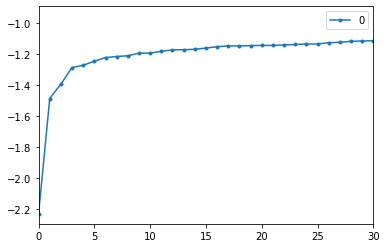

In [12]:
# Plotting Local Outlier Factor analysis
clf = LocalOutlierFactor(n_neighbors=10)
clf.fit_predict(df[num_cols])
df_scores = clf.negative_outlier_factor_
print(np.sort(df_scores))

scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 30], style='.-')
plt.show(block=True)

In [13]:
# Dropping the outliers 
th = np.sort(df_scores)[4]
display(th)
display(df[df_scores < th])
display(df[df_scores < th].shape)
display(df[df_scores < th].index)

df.drop(axis=0, labels=df[df_scores < th].index, inplace=True)
df

-1.2702641207020404

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
32,311,81,3,42,30,26,17,8247,2198,100,950,909,690,1,1,153,223,10,320.0,1,0.044211,0.037711,0.036852,0.030000,0.033003,0.037681,0.266521,0.413558,0.432211,0.045496,82.470000,485.117647,129.294118,5.882353,55.882353,53.470588,40.588235,Expert,Expert-West,StandN,0.717042,0.890110,0.615385,0.864952,0.260450,1.457516,0.370370,0.518519,0.037037,103.666667,386
64,232,55,9,34,23,45,12,4405,1213,194,702,705,625,1,0,623,35,3,1300.0,1,0.048433,0.052667,0.045342,0.046392,0.032624,0.072000,0.275369,0.581204,0.578730,0.159934,22.706186,367.083333,101.083333,16.166667,58.500000,58.750000,52.083333,Expert,Expert-East,StandN,0.150862,0.948276,0.933333,0.431034,0.237069,0.056180,0.418182,0.618182,0.163636,25.777778,661
148,549,149,7,73,47,42,1,549,149,7,73,47,42,1,1,255,450,17,140.0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.271403,0.315436,0.489933,0.046980,78.428571,549.000000,149.000000,7.000000,73.000000,47.000000,42.000000,Junior,Junior-West,StandN,0.819672,0.897590,0.595238,0.950820,0.271403,1.764706,0.315436,0.489933,0.046980,78.428571,722
150,522,163,9,82,46,62,13,7037,2019,153,1043,827,535,0,0,352,9,1,1000.0,0,0.078619,0.074179,0.080733,0.058824,0.055623,0.115888,0.286912,0.409609,0.516592,0.075780,45.993464,541.307692,155.307692,11.769231,80.230769,63.615385,41.153846,Expert,Expert-East,StandA,0.017241,0.993902,0.983871,0.222222,0.312261,0.025568,0.282209,0.503067,0.055215,58.000000,362


(4, 51)

Int64Index([32, 64, 148, 150], dtype='int64')

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.000,1,0.074766,0.091331,0.097006,0.101449,0.091787,0.104000,0.242099,0.495808,0.384431,0.082635,49.985507,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714,Expert,Expert-West,StandN,0.136508,0.890110,0.743590,0.349206,0.257143,0.068038,0.469136,0.296296,0.086420,45.000000,685
1,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.000,1,0.078502,0.088131,0.089524,0.088889,0.093079,0.104520,0.279851,0.532063,0.525714,0.142857,25.013333,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818,Expert,Expert-East,StandN,0.022177,0.979167,0.918919,0.247984,0.284274,0.055000,0.553191,0.460993,0.141844,24.800000,214
2,574,159,21,107,75,59,10,4631,1300,90,702,504,488,0,0,238,445,22,517.143,0,0.152422,0.123947,0.122308,0.233333,0.148810,0.120902,0.280717,0.387692,0.540000,0.069231,51.455556,463.100000,130.000000,9.000000,70.200000,50.400000,48.800000,Senior,Senior-East,StandA,0.775261,0.878453,0.627119,0.970383,0.277003,1.869748,0.471698,0.672956,0.132075,27.333333,705
3,202,53,4,31,26,27,9,1876,467,15,192,186,161,1,1,304,45,11,512.500,1,0.161458,0.107676,0.113490,0.266667,0.139785,0.167702,0.248934,0.398287,0.411135,0.032120,125.066667,208.444444,51.888889,1.666667,21.333333,20.666667,17.888889,Senior,Senior-West,StandN,0.222772,0.828125,0.592593,0.430693,0.262376,0.148026,0.490566,0.584906,0.075472,50.500000,360
4,418,113,13,48,61,47,4,1512,392,41,205,204,203,1,0,211,11,7,550.000,1,0.234146,0.276455,0.288265,0.317073,0.299020,0.231527,0.259259,0.520408,0.522959,0.104592,36.878049,378.000000,98.000000,10.250000,51.250000,51.000000,50.750000,Mid,Mid-East,StandN,0.026316,0.941667,0.851064,0.267943,0.270335,0.052133,0.539823,0.424779,0.115044,32.153846,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,279,69,4,35,31,32,4,1359,355,31,180,148,158,1,0,133,173,9,277.500,1,0.194444,0.205298,0.194366,0.129032,0.209459,0.202532,0.261221,0.416901,0.507042,0.087324,43.838710,339.750000,88.750000,7.750000,45.000000,37.000000,39.500000,Mid,Mid-East,StandN,0.620072,0.884615,0.718750,0.813620,0.247312,1.300752,0.449275,0.507246,0.057971,69.750000,315
168,480,112,18,50,71,44,7,3031,771,110,338,406,239,1,0,94,270,16,750.000,1,0.147929,0.158364,0.145266,0.163636,0.174877,0.184100,0.254371,0.526589,0.438392,0.142672,27.554545,433.000000,110.142857,15.714286,48.285714,58.000000,34.142857,Senior,Senior-East,StandN,0.562500,0.875000,0.636364,0.768750,0.233333,2.872340,0.633929,0.446429,0.160714,26.666667,380
169,360,81,5,37,44,37,7,2268,566,41,279,257,246,1,0,170,284,3,525.000,1,0.132616,0.158730,0.143110,0.121951,0.171206,0.150407,0.249559,0.454064,0.492933,0.072438,55.317073,324.000000,80.857143,5.857143,39.857143,36.714286,35.142857,Senior,Senior-East,StandN,0.788889,0.964286,0.918919,1.005556,0.225000,1.670588,0.543210,0.456790,0.061728,72.000000,457
170,497,127,7,65,48,37,5,2703,806,32,379,311,138,1,0,325,9,3,700.000,1,0.171504,0.183870,0.157568,0.218750,0.154341,0.268116,0.298187,0.385856,0.470223,0.039702,84.468750,540.600000,161.200000,6.400000,75.800000,62.200000,27.600000,Mid,Mid-East,StandN,0.018109,0.976923,0.918919,0.183099,0.255533,0.027692,0.377953,0.511811,0.055

In [14]:
# Applying the one hot encoding
encoded_df = pd.get_dummies(df, drop_first=True)
encoded_df

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES,NEW_YEARS_LEVEL_Junior,NEW_YEARS_LEVEL_Mid,NEW_YEARS_LEVEL_Senior,NEW_DIV_CAT_Expert-West,NEW_DIV_CAT_Junior-East,NEW_DIV_CAT_Junior-West,NEW_DIV_CAT_Mid-East,NEW_DIV_CAT_Mid-West,NEW_DIV_CAT_Senior-East,NEW_DIV_CAT_Senior-West,NEW_PLAYER_PROGRESS_Descend,NEW_PLAYER_PROGRESS_StandA,NEW_PLAYER_PROGRESS_StandN
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.000,1,0.074766,0.091331,0.097006,0.101449,0.091787,0.104000,0.242099,0.495808,0.384431,0.082635,49.985507,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714,0.136508,0.890110,0.743590,0.349206,0.257143,0.068038,0.469136,0.296296,0.086420,45.000000,685,0,0,0,1,0,0,0,0,0,0,0,0,1
1,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.000,1,0.078502,0.088131,0.089524,0.088889,0.093079,0.104520,0.279851,0.532063,0.525714,0.142857,25.013333,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818,0.022177,0.979167,0.918919,0.247984,0.284274,0.055000,0.553191,0.460993,0.141844,24.800000,214,0,0,0,0,0,0,0,0,0,0,0,0,1
2,574,159,21,107,75,59,10,4631,1300,90,702,504,488,0,0,238,445,22,517.143,0,0.152422,0.123947,0.122308,0.233333,0.148810,0.120902,0.280717,0.387692,0.540000,0.069231,51.455556,463.100000,130.000000,9.000000,70.200000,50.400000,48.800000,0.775261,0.878453,0.627119,0.970383,0.277003,1.869748,0.471698,0.672956,0.132075,27.333333,705,0,0,1,0,0,0,0,0,1,0,0,1,0
3,202,53,4,31,26,27,9,1876,467,15,192,186,161,1,1,304,45,11,512.500,1,0.161458,0.107676,0.113490,0.266667,0.139785,0.167702,0.248934,0.398287,0.411135,0.032120,125.066667,208.444444,51.888889,1.666667,21.333333,20.666667,17.888889,0.222772,0.828125,0.592593,0.430693,0.262376,0.148026,0.490566,0.584906,0.075472,50.500000,360,0,0,1,0,0,0,0,0,0,1,0,0,1
4,418,113,13,48,61,47,4,1512,392,41,205,204,203,1,0,211,11,7,550.000,1,0.234146,0.276455,0.288265,0.317073,0.299020,0.231527,0.259259,0.520408,0.522959,0.104592,36.878049,378.000000,98.000000,10.250000,51.250000,51.000000,50.750000,0.026316,0.941667,0.851064,0.267943,0.270335,0.052133,0.539823,0.424779,0.115044,32.153846,229,0,1,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,279,69,4,35,31,32,4,1359,355,31,180,148,158,1,0,133,173,9,277.500,1,0.194444,0.205298,0.194366,0.129032,0.209459,0.202532,0.261221,0.416901,0.507042,0.087324,43.838710,339.750000,88.750000,7.750000,45.000000,37.000000,39.500000,0.620072,0.884615,0.718750,0.813620,0.247312,1.300752,0.449275,0.507246,0.057971,69.750000,315,0,1,0,0,0,0,1,0,0,0,0,0,1
168,480,112,18,50,71,44,7,3031,771,110,338,406,239,1,0,94,270,16,750.000,1,0.147929,0.158364,0.145266,0.163636,0.174877,0.184100,0.254371,0.526589,0.438392,0.142672,27.554545,433.000000,110.142857,15.714286,48.285714,58.000000,34.142857,0.562500,0.875000,0.636364,0.768750,0.233333,2.872340,0.633929,0.446429,0.160714,26.666667,380,0,0,1,0,0,0,0,0,1,0,0,0,1
169,360,81,5,37,44,37,7,2268,566,41,279,257,246,1,0,170,284,3,525.000,1,0.132616,0.158730,0.143110,0.121951,0.171206,0.150407,0.249559,0.454064,0.492933,0.072438,55.317073,324.000000,80.857143,5.857143,39.857143,36.714286,35.142857,0.788889,0.964286,0.918919,1.005556,0.225000,1.670588,0.543210,0.456790,0.061728,72.000000,457,0,0,1,0,0,0,0,0,1,0,0,0,1
170,497,127,7,6

In [15]:
# Splitting the input features and the target feature
y = encoded_df["SALARY"]
X = encoded_df.drop("SALARY", axis=1)

In [16]:
num_cols_of_X = [col for col in encoded_df.columns if col not in "SALARY"]

# Scaling the data into the interval [0, 1]
scaler = MinMaxScaler()
X[num_cols_of_X] = scaler.fit_transform(X[num_cols_of_X])
X

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_ASSISTS_RATIO,NEW_HITS_RECALL,NEW_NET_HELPFUL_ERROR,NEW_TOTAL_SCORE,NEW_HIT_RATE,NEW_TOUCHER,NEW_RUNNER,NEW_HIT-AND-RUN,NEW_HMHITS_RATIO,NEW_HMATBAT_RATIO,NEW_TOTAL_CHANCES,NEW_YEARS_LEVEL_Junior,NEW_YEARS_LEVEL_Mid,NEW_YEARS_LEVEL_Senior,NEW_DIV_CAT_Expert-West,NEW_DIV_CAT_Junior-East,NEW_DIV_CAT_Junior-West,NEW_DIV_CAT_Mid-East,NEW_DIV_CAT_Mid-West,NEW_DIV_CAT_Senior-East,NEW_DIV_CAT_Senior-West,NEW_PLAYER_PROGRESS_Descend,NEW_PLAYER_PROGRESS_StandA,NEW_PLAYER_PROGRESS_StandN
0,0.335714,0.256545,0.175,0.103774,0.258929,0.400000,0.764706,0.542317,0.424812,0.306667,0.313990,0.486747,0.574367,1.0,1.0,0.921283,0.087398,0.384615,1.0,0.046779,0.053539,0.062777,0.057076,0.055355,0.069627,0.224092,0.531110,0.294681,0.293174,0.177055,0.313552,0.248487,0.205357,0.206027,0.324691,0.332324,0.114364,0.560440,0.733333,0.179195,0.392065,0.017141,0.395587,0.089372,0.329966,0.213920,0.795587,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.658929,0.570681,0.500,0.490566,0.616071,0.373333,0.588235,0.903916,0.822234,1.000000,0.839378,0.997590,0.541139,1.0,0.0,0.291545,0.022358,0.115385,1.0,0.050628,0.050206,0.055011,0.043896,0.056698,0.070166,0.574388,0.597609,0.637984,0.506832,0.049246,0.773042,0.710028,0.852273,0.843076,0.901484,0.414638,0.018580,0.916667,0.915676,0.099905,0.591446,0.013857,0.535084,0.433478,0.541586,0.071189,0.248548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.798214,0.664921,0.525,0.886792,0.589286,0.666667,0.529412,0.738467,0.674544,0.400000,0.708808,0.595181,0.753165,0.0,0.0,0.346939,0.904472,0.846154,0.0,0.126783,0.087512,0.089038,0.195473,0.114664,0.087177,0.582425,0.332803,0.672696,0.245619,0.184579,0.688972,0.637201,0.375000,0.781339,0.582440,0.668136,0.649500,0.513812,0.612203,0.665776,0.538016,0.471061,0.399839,0.876339,0.504288,0.089089,0.818815,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.133929,0.109948,0.100,0.169811,0.151786,0.240000,0.470588,0.281281,0.227175,0.066667,0.180311,0.212048,0.235759,1.0,1.0,0.443149,0.091463,0.423077,1.0,0.136093,0.070564,0.079886,0.230453,0.105278,0.135772,0.287511,0.352235,0.359568,0.113956,0.561325,0.247883,0.205648,0.069444,0.186613,0.214496,0.196610,0.186635,0.312500,0.576296,0.243025,0.430524,0.037293,0.431152,0.692373,0.288165,0.252782,0.418118,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.519643,0.424084,0.325,0.330189,0.464286,0.506667,0.176471,0.220876,0.186896,0.182222,0.193782,0.233735,0.302215,1.0,0.0,0.307580,0.022358,0.269231,1.0,0.210980,0.246362,0.261286,0.283348,0.270900,0.202046,0.383320,0.576231,0.631289,0.371074,0.109970,0.541570,0.460405,0.427083,0.550710,0.589864,0.697881,0.022047,0.766667,0.845106,0.115539,0.489010,0.013134,0.512898,0.357814,0.439260,0.123150,0.265970,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,0.271429,0.193717,0.100,0.207547,0.196429,0.306667,0.176471,0.195486,0.167025,0.137778,0.167876,0.166265,0.231013,1.0,0.0,0.193878,0.351626,0.346154,1.0,0.170077,0.172246,0.163828,0.086022,0.177747,0.171938,0.401527,0.386378,0.592613,0.309810,0.145596,0.475318,0.409300,0.322917,0.474645,0.416618,0.526271,0.519485,0.538462,0.707500,0.542980,0.319820,0.327709,0.362627,0.530116,0.221344,0.388801,0.365854,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
168,0.630357,0.418848,0.450,0.349057,0.553571,0.466667,0.352941,0.472951,0.390440,0.488889,0.331606,0.4771

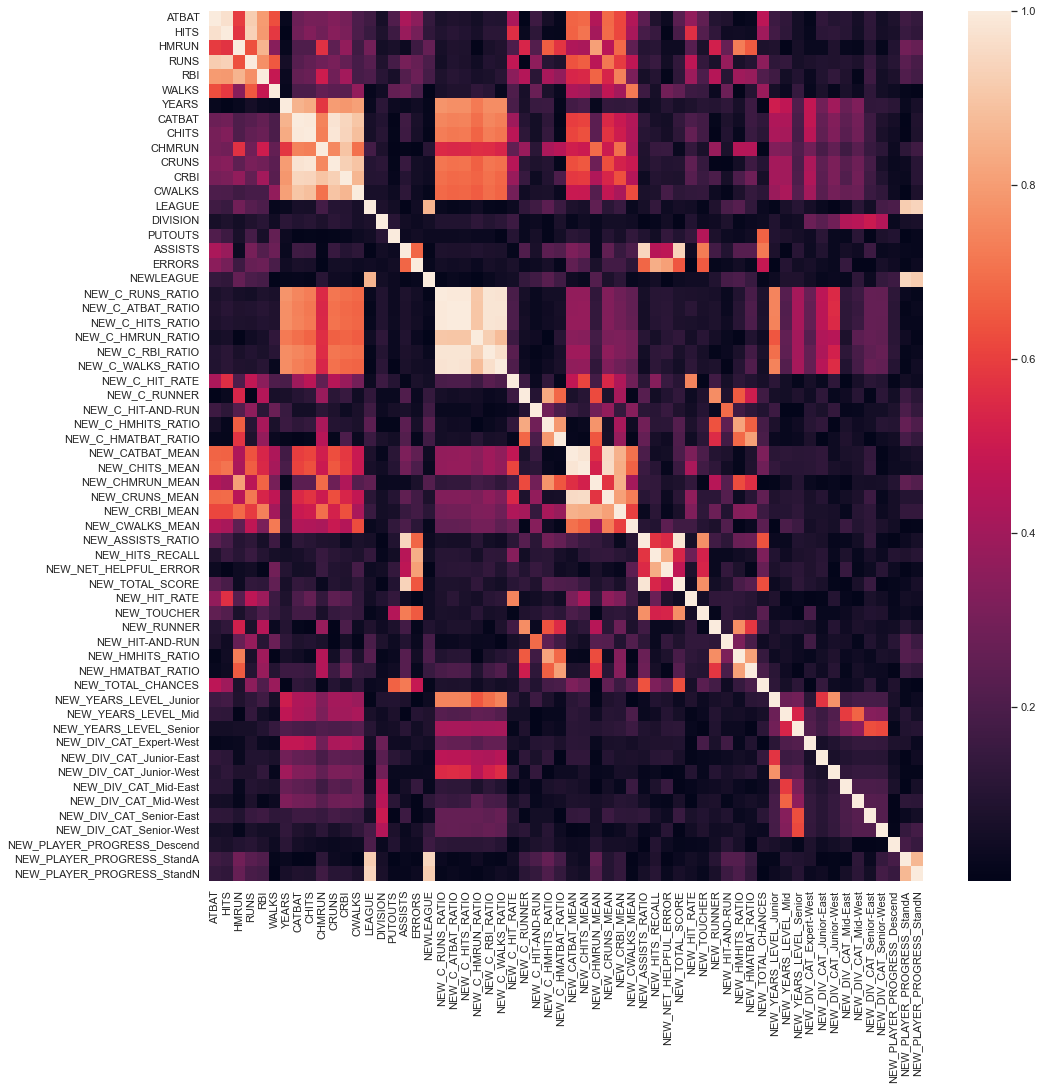

In [17]:
# Showing the correlations
correlations = X.corr().abs()
sns.set(rc={'figure.figsize': (16, 16)})
sns.heatmap(correlations)
plt.show(block=True)

In [18]:
# Select upper triangle of correlation matrix
upper = correlations.where(np.triu(np.ones(correlations.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

# Drop features 
X.drop(to_drop, axis=1, inplace=True)

['HITS', 'CHITS', 'CRUNS', 'NEW_C_ATBAT_RATIO', 'NEW_C_HITS_RATIO', 'NEW_C_RBI_RATIO', 'NEW_C_WALKS_RATIO', 'NEW_CHITS_MEAN', 'NEW_CRUNS_MEAN', 'NEW_TOTAL_SCORE']


In [19]:
# Splitting the training-testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
# Creating a regression model and giving the training inputs to the created model
"""
Observing the "Root Mean Squared Error(RMSE)" value to evaluate the model. Less is the best for RMSE.
It indicates the standart deviation of the predicted values around the target varible.
""" 
model = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1],
              'subsample': [0.1, 0.25, 0.5, 0.75, 0.9],
              'n_estimators': [100, 250, 500, 750, 1000], 
              'max_depth': list(range(1, 11))}
grid_model = GridSearchCV(estimator=model, param_grid=parameters, 
                          scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
fitted = grid_model.fit(X_train, y_train)

# RMSE result
np.sqrt(-(fitted.best_score_))

158.8023896616714